<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/FINAL_HISTORICAL_BATTLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [37]:
#Iwo Jima Battle
#numbers adjusted for the gradual increasement of forces in the beginning of battle
Amer0 = 66000 #20000*4 
jap0 = 18000 #20000
AmerFinal = 20000*3
japFinal = 0
#with the time starting at the linear section of the battle
timeend = 30 #days

The solver successfully reached the end of the integration interval.
nfev =  26


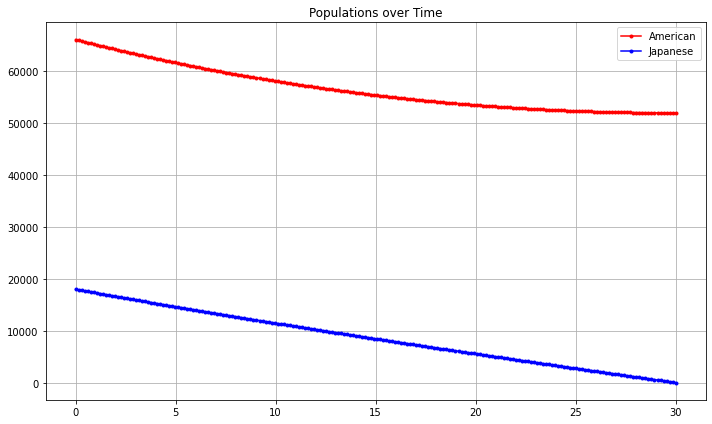

In [38]:
# japamer p1 = amer, p2 = japattletime = 4 #seconds
battletime = timeend
japlosses = jap0 - japFinal 
amerlosses = Amer0 - AmerFinal
beta = 0.0544
alpha = 0.0106
'''avgjap = (jap0+japFinal) / 2
avgamer = (Amer0+AmerFinal) /  2
cSA = 6 #jap surface area that can attack
ckr = amerlosses/(battletime*avgjap)
kkr = japlosses/(battletime*avgamer)'''

def f(t,yvec):
  ampop = yvec[0]  # america 
  jappop = yvec[1] #japan
  return [-beta*jappop, -alpha*ampop]

def amerloss(t,yvec):
  return yvec[0]

def japloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [Amer0, jap0] 
t = np.linspace(0, TMAX, num=200)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(amerloss,japloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
amer = ivp.y[0]
jap = ivp.y[1]

plt.figure(figsize=(10,6))
#plt.subplot(2,1,1)
plt.plot(t, amer,'.-',color='red',label='American')
#plt.ylim(50000,74000)
plt.grid()
plt.title('Populations over Time')
#plt.title('amer Population')
#plt.subplot(2,1,2)
plt.plot(t, jap,'r.-',color='blue',label='Japanese')
#plt.grid()
#plt.ylim(0,20000)
#plt.title('jap Population')
plt.legend()
plt.tight_layout()
plt.show()

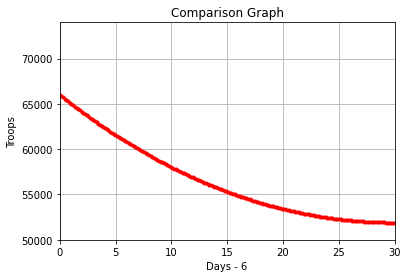

In [45]:
plt.plot(t, amer,'.-',color='red',label='American Active Troops')
plt.ylim(50000,74000)
plt.xlim(0,30)
plt.grid()
plt.title('Comparison Graph')
plt.xlabel('Days - 6')
plt.ylabel('Troops')
plt.show()

In [44]:
x = 200 / TMAX
tf = 30*x
tf = int(tf)
print('Americans, Japanese \n')
print(f'model:  {amer[tf-1]:0.4}')
print(f'actual: {AmerFinal}')
print(f'model:  {jap[tf-1]:0.4}')
print(f'actual: {japFinal}')

Americans, Japanese 

model:  5.19e+04
actual: 60000
model:  25.32
actual: 0
